# Лабораторная работа №3: регрессионный анализ
Выполнил студент гр. 1384 Шушков Егор Вариант №23

## Цель работы
Исследовать метод наименьших квадратов для оценки параметров, изучить, что такое регрессия, в частности линейная регрессия, а также как МНК используется в регрессионном анализе. Узнать, как доказывать\опровергать гипотезы.

## Основные теоретические положения
**Определения**:
\
\-Линейная регрессия: зависимость $y$ от набора независимых переменных $\vec{x} = (x_1, …, x_n)$, где n – это количество наблюдений. Эту зависимость можно описать как: $y =\beta_0  + \beta_1 x_1 + ⋯ + \beta_n x_n + ϵ$ - уравнение регрессии. $\beta_0, \beta_1, …, \beta_n$, и $ϵ$ – неустранимая ошибка.
\
\
-Метод наименьших квадратов (МНК):
\
Нормальные уравнения: $XX^{\intercal}\beta=XY$\
Решение системы нормальных уравнений в регулярном случае: $\widehat{\beta}=(XX^{\intercal})^{-1}XY$
\
$RSS(\widehat{β}) = \sum_{i=1}^{n}(Y_i-\widehat{Y_i})^2$
\
\
-Несмещённая оценка дисперсии $S^{2}$:
\
$s^2 = \frac{RSS(\widehat{β})}{n-r}$, где $r = rankX$, n - количество измерений.
\
\
-Доверительный интервал уровня доверия 1 - α:
\
$Ψ \in [\widehat{Ψ_β} - x_αs\sqrt{b}, \widehat{Ψ_β} + x_αs\sqrt{b}]$, где $x_α: S_{n-r}(x_α) = 1 - \frac{α}{2}$
\
\
-F-статистика:
\
$F = \frac{SS_Н/q}{SS_e/(n-r)}$, где $SS_Н = RSS(\widehat{β_Н}) - RSS(\widehat{β_Н})$, $\widehat{β_Н}$ - МНК-оценка параметров при выполнении основной гипотезы, $SS_e = RSS(\widehat{β})$
\
\
-Доверительные эллипсоиды уровня доверия 1 - α для параметров:
\
$A_α = \{\vec{x}: (\vec{x} - \widehat{Ψ})^T B^{-1} (\vec{x} - \widehat{Ψ}) \le qs^2x_α \}$, где $x_α: F_{q,n-r}(x_α) = 1 - α$, $\space B = C^T(XX^T)^{-1}C$


## Постановка задачи
1. Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной $Y$ по переменной $X$. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.
2. Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом $h=2.10$. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha=0.20$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.
3. В предположении нормальности ошибок построить доверительные интервалы для параметров  $\beta_0$ и  $\beta_1$ уровня доверия $1 - \alpha$. Построить доверительный эллипс уровня доверия $1 - \alpha$ для ($\beta_0$, $\beta_1$) (вычислить его полуоси).
4. Сформулировать гипотезу независимости переменной Y от переменной X. Провести проверку значимости.
5. Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров  $\beta_0$, $\beta_1$, $\beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.
6. Построить несмещённую оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.
7. В предположении нормальности ошибок построить доверительные интервалы для параметров  $\beta_0$, $\beta_1$, $\beta_2$ уровня доверия $1 - \alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1 - \alpha$.
8. Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной X и проверить её значимость на уровне $\alpha$.

## Выполнение работы
### 1. Построить графические результаты эксперимента. Сформулировать линейную регрессионную модель перменной Y от переменной Х. Построить МНК оценки параметров сдвига $β_0$ и масштаба $β_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

Представим графически результаты эксперимента. Для этого воспользуемся визуализацией на языке R (см. график "Результаты эксперимента").








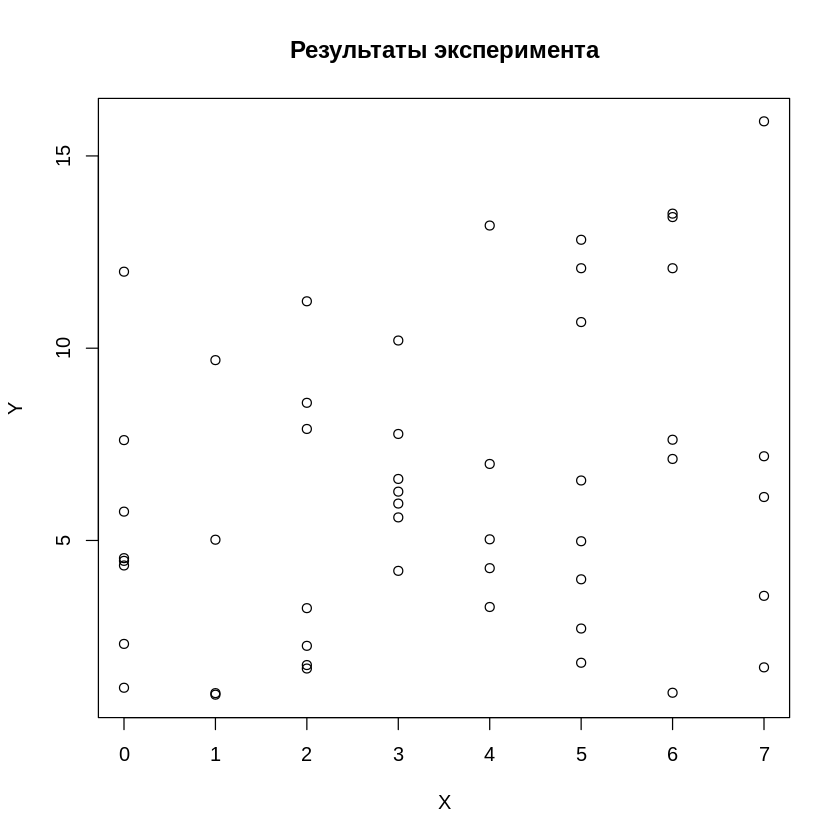

In [46]:
Y <- c(4.47, 5.02, 1.82, 13.19, 13.50, 7.19, 1.76, 11.22, 12.82, 6.99, 11.99, 0.99, 10.20, 7.62, 15.90, 12.08, 6.13, 7.77, 7.12, 3.56, 9.69, 6.27, 2.26, 6.60, 6.56, 4.98, 4.21, 4.54, 4.35, 12.08, 3.99, 2.71, 1.03, 7.61, 10.68, 5.75, 4.28, 1.04, 3.27, 1.17, 13.41, 8.58, 5.96, 5.60, 7.90, 1.70, 1.67, 5.03, 2.31, 3.24)
X <- c(0, 1, 5, 4, 6, 7, 2, 2, 5, 4, 0, 1, 3, 6, 7, 6, 7, 3, 6, 7, 1, 3, 2, 3, 5, 5, 3, 0, 0, 5, 5, 5, 1, 0, 5, 0, 4, 6, 4, 0, 6, 2, 3, 3, 2, 7, 2, 4, 0, 2)
nums <- c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50)
vector_of_ones <- rep(1, 50)

plot(X, Y, xlab = "X", ylab = "Y", main = "Результаты эксперимента")

Линейную регрессионную модель можно представить в таком виде: $Y = X^Tβ+ϵ$, где в нашем случае:
\
$ X =
  \left[ {\begin{array}{cc}
    1 & 1 & 1 & 1 & 1 & ... \\
    0 & 1 & 5 & 4 & 6 & ... \\
  \end{array} } \right]
$, т.е. первая строка - единицы, вторая - значения Х из нашего эксперимента.
\
$ β = \left[ {\begin{array}{cc}
    β_0  \\
    β_1 \\
  \end{array} } \right] $, ϵ - неустранимая ошибка.
\
\
Построим МНК-оценку для параметров (все вычисления воспроизводились с помощью языка R):
\
1) $XX^T =
  \left[ {\begin{array}{cc}
    1 & 1 & 1 & 1 & 1 & ... \\
    0 & 1 & 5 & 4 & 6 & ... \\
  \end{array} } \right] ⋅
  \left[ {\begin{array}{cc}
    1 & 0 \\
    1 & 1 \\
    1 & 5 \\
    1 & 4 \\
    1 & 6 \\
    ... & ...
  \end{array} } \right] =
  \left[ {\begin{array}{cc}
    42925 & 4118 \\
    4118 & 836 \\
  \end{array} } \right] $
\
2)$ (XX^T)^{-1} =
\left[ {\begin{array}{cc}
    4.417e-05 & -0.000218 \\
    -0.000218 & 0.00227 \\
\end{array} } \right] $
\
3)$(XX^T)^{-1}XY =
\left[ {\begin{array}{cc}
    0.055 \\
    1.174 \\
\end{array} } \right] = \widehat{β}$  
\
$\widehat{β}$ - это наша МНК оценка.
\
\
Теперь построим на графике cполученную линию регрессии.


                    [,1]
vector_of_ones 4.7925860
X              0.4716512


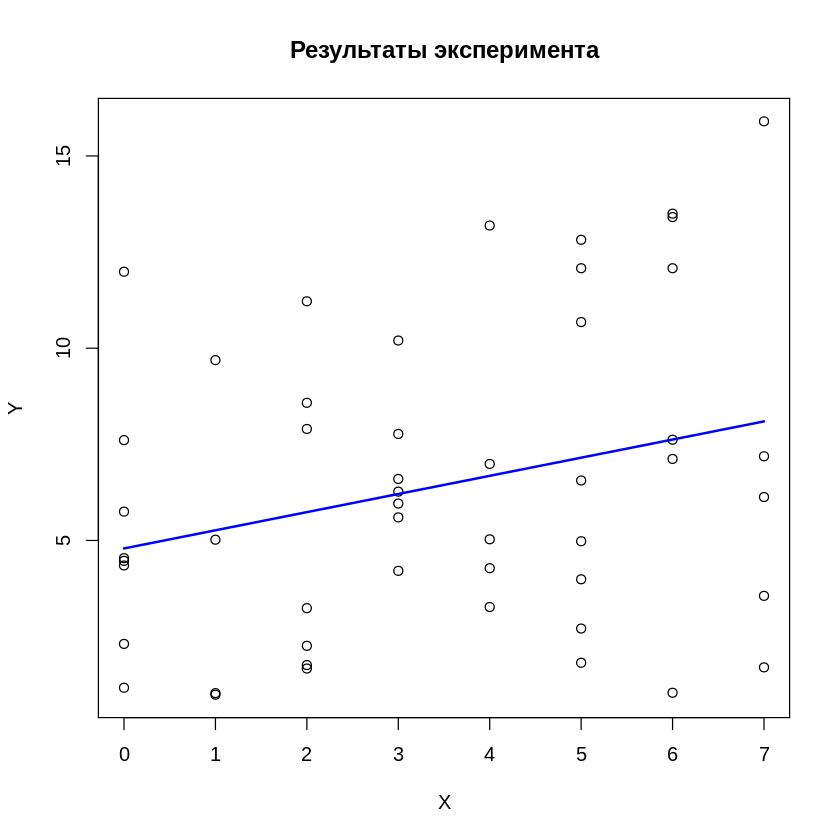

In [66]:
X_matrix <- rbind(vector_of_ones, X)

beta <- solve(X_matrix %*% t(X_matrix)) %*% X_matrix %*% Y

print(beta)

f <- function(x) {
  return(0.472 * x + 4.793)
}

y_reg <- f(X)

plot(X, Y, xlab = "X", ylab = "Y", main = "Результаты эксперимента")
lines(X, y_reg, col = "blue", lwd = 2)

Если учитывать наличие неустранимой ошибки, с визуальной точки зрения полученная линия регрессии имеет схожесть с тем, как именно распределяются значения эксперимента. К тому же, ошибки находятся примерно в равной области с двух сторон от прямой.

### 2) Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом h. Проверить гипотезу нормальности ошибок на уровне значимости α по $χ^2$. Оценить расстояние полученной оценки класса нормальных распределений по Колмогорову. Визуально оценить данный факт.
Воспользуемся формулой: $s^2 = \frac{RSS(\widehat{β})}{n-r}$, где
\
$r = rankX$ = 2, n = 50,
\
$RSS(\widehat{β}) = \sum_{i=1}^{n}(Y_i-\widehat{Y_i})^2 = \sum_{i=1}^{n}(Y_i - (\widehat{β_0} + \widehat{β_1}x_i)^2) = \sum_{i=1}^{n}(Y_i - \widehat{β_0} - \widehat{β_1}x_i)^2 = 705.82$
\
Подставив эти значения в формулу получим, что $s^2 = 14.7$





In [48]:
f_sum <- function(yC, xC) {
  sum <- 0
  for(i in 1:50){
    sum <- sum + (yC[i] - 0.472 * xC[i] - 4.793)^2
  }
  return(sum)
}

rss <- f_sum(Y,X)

print(rss)

[1] 705.82


Построим гистограмму с шагом h = 2.10 на базе ошибок. Для этого вычислим ошибку, основываясь на линии регресса и реальных значениях.

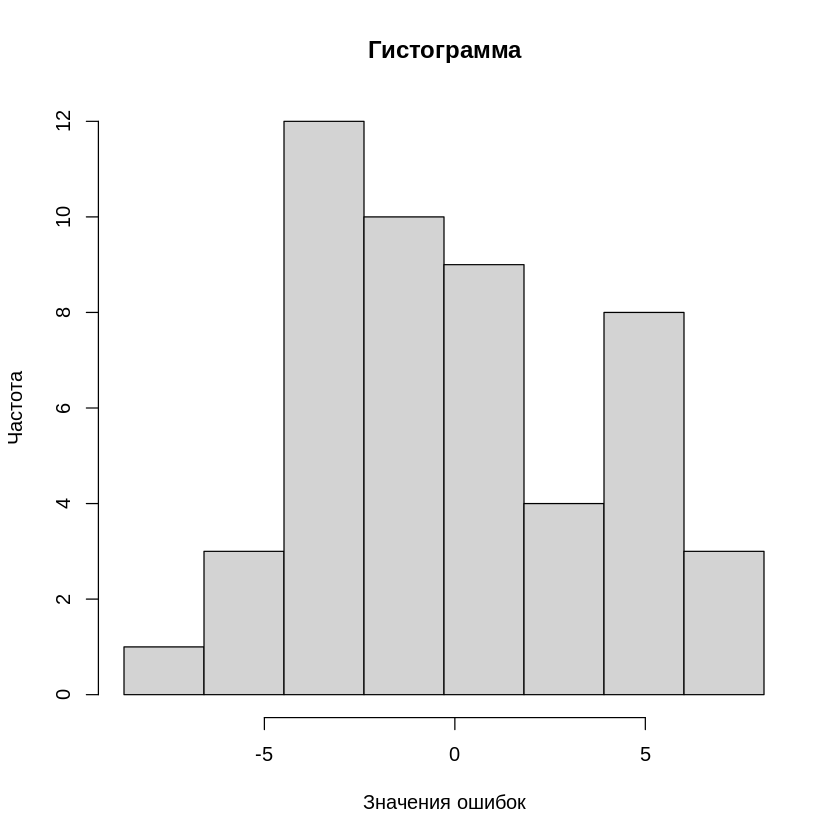

In [67]:
Y_errors <- Y - y_reg

hist_obj <- hist(Y_errors, breaks = seq(min(Y_errors)-2.1, max(Y_errors)+2.1, by = 2.1), main = "Гистограмма", xlab = "Значения ошибок", ylab = "Частота")

Теперь проверим теорию о нормальности ошибок на уровне значимости α по $χ^2$. Предпологая, что теория о нормальности ошибок означает "Распределение ошибок - это нормальное распределение", используем алгоритм для простой теории.
\
$H_0: Φ ≡ F_0$ - основная теория, где $Φ$ - функция нормального распределения, а $F_0$ - функция распределения ошибок.
\
$H_0: Φ(x) \ne F_0(x)$ - альтернативная теория при некотором $x \in ℝ$
\
Сгруппируем данные в соответствие с гистограммой:
\
\begin{array}{|c|c|c|}
 \hline
 j & I_j & ν_j \\
 \hline
 1 & (-8.685, -6.585] & 1  \\
 \hline
 2 & (-6.585, -4.485] & 3 \\  
 \hline
 3 & (-4.485, -2.385] & 12  \\
 \hline
 4 & (-2.385, -0.285] & 10 \\
 \hline
 5 & (-0.285, 1.815] & 9 \\
 \hline
 6 & (1.815, 3.915] & 4 \\
 \hline
 7 & (3.915, 6.015] & 8  \\  
 \hline
 8 & (6.015, 8.115] & 3  \\  
 \hline
\end{array}
\
Статистику критерия хи-квадрат можно вычислить по формуле: $χ^2 = \sum_{j=1}^{r}\frac{(ν_j-np_{j0})^2}{np_{j0}}$
\
$p_{0j}$ - гипотетические вероятности попадания в интервалы, вычисляемые по формуле: $Φ(I_j) = Φ(b) - Φ(a)$, предполагается, что $e⁓𝒩(0, s^2E)$, где Е - это единичная матрица, а e - матрица неустранимых ошибок
\
Составим таблицу, в которую занесём вычисленные значения для $p_{0j}$ и статистики (вычисления сделаны на языке R, см. ниже):
\
\begin{array}{|c|c|c|}
 \hline
 j & p_{j0} & \frac{(ν_j-np_{j0})^2}{np_{j0}} \\
 \hline
 1 & 0.03119433 & 0.201295842  \\
 \hline
 2 & 0.07810118 & 0.210035898 \\  
 \hline
 3 & 0.14590743 & 3.034362447  \\
 \hline
 4 & 0.20341998 & 0.002825541 \\
 \hline
 5 & 0.21165968 & 0.236313314 \\
 \hline
 6 & 0.16436707 & 2.164741633 \\
 \hline
 7 & 0.09525752 & 2.199221499  \\  
 \hline
 8 & 0.04119456 & 0.428351187  \\
 \hline
\end{array}
\
Отсюда следует, что $χ^2 = 8.477147$.







In [50]:
leftInterval <- c(-8.685, -6.585, -4.485, -2.385, -0.285, 1.815, 3.915, 6.015)
rightInterval <- c(-6.585, -4.485, -2.385, -0.285, 1.815, 3.915, 6.015, 8.115)
freq <- c(1, 3, 12, 10, 9, 4, 8, 3)

f_dnorm <- function(lI, rI){
  result <- rep(NA, times = 8)
  for(i in 1:8){
    result[i] <- pnorm(rI[i], 0, 14.705^0.5) - pnorm(lI[i], 0, 14.705^0.5)
  }
  return(result)
}

p0j <- f_dnorm(leftInterval, rightInterval)

stat_crit <- function(p0jc, freqc){
  result <- rep(NA, times = 8)
  for(i in 1:8){
    result[i] <- ((freqc[i] - 50 * p0jc[i])^2)/(50 * p0jc[i])
  }
  return(result)
}

X2 <- sum(stat_crit(p0j, freq))
print(X2)

[1] 8.477147


$x_α: K_{r-1}(x_α) = 1 - α = 1 - 0.2 = 0.8$
\
Таким образом, используя язык R, находим, что квантиль $x_α$ хи-квадрата в данном случае будет равен 9.80325.
\
$x_α > χ^2 ⇒ $ гипотеза принимается, т.е. $e ∼ 𝒩(0, 14.7)$.


In [68]:
x_a <- qchisq(0.8, 7)
print(x_a)

[1] 9.80325


Теперь оценим расстояние полученной оценки класса нормальных распределений по Колмогорову. Снова предмолагаем, что:
\
$H_0: Φ ≡ F_0$ - основная теория, где $Φ$ - функция нормального распределения, а $F_0$ - функция распределения ошибок, причём $e ∼ 𝒩(0, 14.7)$.
\
$H_0: Φ(x) \ne F_0(x)$ - альтернативная теория при некотором $x \in ℝ$
\
Статистика критерия Колмагорова будет определяться как: $D_n = sup_{x \in ℝ}|{e_x - Φ(x)}|$
\
Сам же критерий Колмагорова уровня значимости α определяется как:
\
$\widetilde{ϕ} = \left\{
\begin{array}{lr}
  0, \space при \space D_n \le x_α \\
  1, \space при \space D_n \gt x_α
\end{array}
\right.$, в это случае $x_α$ будет определяться как: $K_n(x_α) = 1 - \alpha = 0.8$
\
Определим, чему будет равно $x_α$ и $D_n$ с помощью встроенной функции языка R. Эта функция возвращает нам значение p-value, которое обозначает минимальную уровень доверия, при котором наша теория отвергается.

In [52]:
ks.test(Y_errors, "pnorm")


	Exact one-sample Kolmogorov-Smirnov test

data:  Y_errors
D = 0.35541, p-value = 3.71e-06
alternative hypothesis: two-sided


Так как p-value < α, то наша теория будет опровергаться по Колмагорову. Теперь визуально оценим, полученный факт. Из графика, построенного ниже, видно, что в некоторых местах функция распределения ошибки достаточно сильно отклоняется от нормального распределения. Особенно это заметно в промежутке от нуля до восьми.

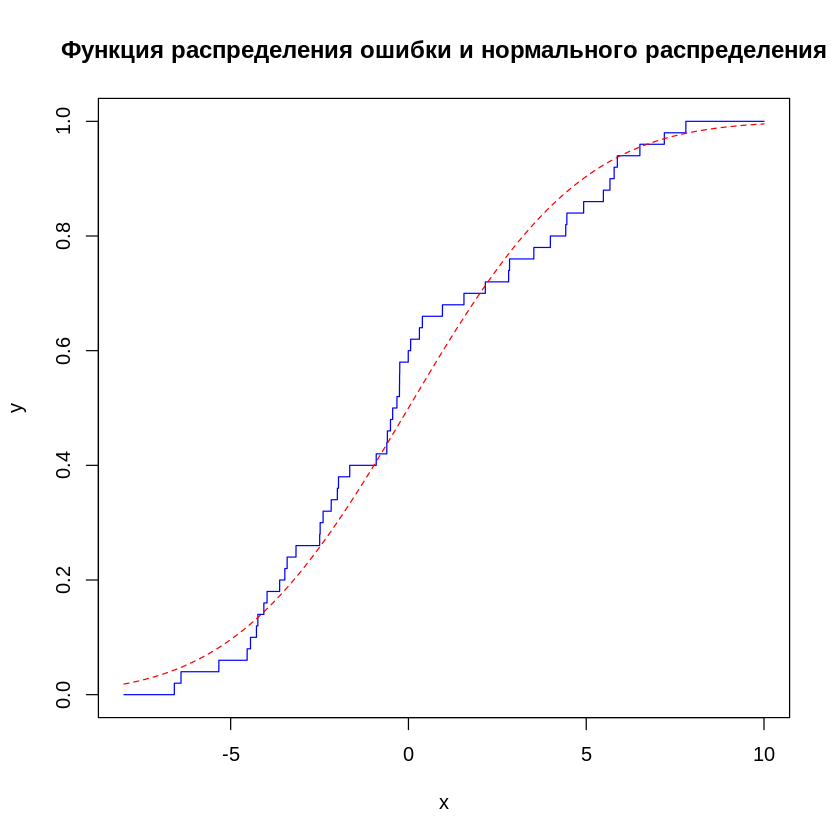

In [53]:
Fn <- function(x) {
  Ye <- c(-0.323, -0.245, -5.333, 6.509, 5.875, -0.907, -3.977, 5.483, 5.667, 0.309, 7.197, -4.275, 3.991, -0.005, 7.803, 4.455, -1.967, 1.561, -0.505, -4.537, 4.425, 0.061, -3.477, 0.391, -0.593, -2.173, -1.999, -0.253, -0.443, 4.927, -3.163, -4.443, -4.235, 2.817, 3.527, 0.957, -2.401, -6.585, -3.411, -3.623, 5.785, 2.843, -0.249, -0.609, 2.163, -6.397, -4.067, -1.651, -2.483, -2.497)

  sm <- sum(Ye < x)
  return(sm / 50)
}

x_val <- seq(-8, 10, 0.001)
y_err <- sapply(x_val, Fn)
y_norm <- pnorm(x_val, mean = 0, sd = sqrt(14.7))

plot(x_val, y_err, type = 'l', col = 'blue', xlab = 'x', ylab = 'y', main = 'Функция распределения ошибки и нормального распределения')
lines(x_val, y_norm, col = 'red', lty = 2)

###3) В предположении нормальности ошибок построить доверительные интервалы для праметров $β_0$ и $β_1$ уровня доверия 1 - α. Построить доверительный эллипс уровня доверия 1 - α для ($β_0$, $β_1$).
Построим доверительный интервал (промежуточные вычисления представлены в коде ниже):
\
$Ψ_{β0} =
\left[ {\begin{array}{cc}
    1  \\
    0 \\
\end{array} } \right]^T
\
\left[ {\begin{array}{cc}
  β_0  \\
  β_1 \\
\end{array} } \right]
\
Ψ_{β1} =
\left[ {\begin{array}{cc}
    0  \\
    1 \\
\end{array} } \right]^T
\
\left[ {\begin{array}{cc}
  β_0  \\
  β_1 \\
\end{array} } \right]$
\
\
$b_{Ψ} = C^T(XX^T)^{-1}C$
\
$b_{Ψ_{β_0}} = 0.065$
\
$b_{Ψ_{β_1}} = 0.004$
\
\
$\widehat{Ψ} = C^T
\
\left[ {\begin{array}{cc}
  \widehat{β_0}  \\
  \widehat{β_1} \\
\end{array} } \right]$
\
$\widehat{Ψ_{β_0}} = 4.793$
\
$\widehat{Ψ_{β_1}} = 0.472$
\
\
Известно, что: $\frac{\widehat{Ψ} - Ψ}{s\sqrt{b_Ψ}} \sim S_{n-r}$. Таким образом, доверительный интервал будет равен:
\
$Ψ \in [\widehat{Ψ_β} - x_αs\sqrt{b}, \widehat{Ψ_β} + x_αs\sqrt{b}]$, где $x_α: S_{n-r}(x_α) = 1 - \frac{α}{2} = 0.9$
\
Используя язык R получаем, что $x_α = 1,299$, таким образом:
\
\
Доверительный интервал $β_0$: от 3.524698 до 6.061302
\
Доверительный интервал $β_1$: от 0.1618265 до 0.7821735

In [54]:
C0 <- c(1, 0)
C1 <- c(0, 1)

b0 <- t(C0) %*% solve(X_matrix %*% t(X_matrix)) %*% C0
b1 <- t(C1) %*% solve(X_matrix %*% t(X_matrix)) %*% C1

cat("b0:",b0,"\n")
cat("b1:",b1,"\n")

x_a <- qt(0.9, 48)

cat("x_a:",x_a,"\n")
cat("Доверительный интервал beta-0: от", 4.793 - x_a * sqrt(14.7 * b0), "до", 4.793 + x_a * sqrt(14.7 * b0), "\n")
cat("Доверительный интервал beta-1: от", 0.472 - x_a * sqrt(14.7 * b1), "до", 0.472 + x_a * sqrt(14.7 * b1), "\n")

b0: 0.0648062 
b1: 0.003875969 
x_a: 1.299439 
Доверительный интервал beta-0: от 3.524698 до 6.061302 
Доверительный интервал beta-1: от 0.1618265 до 0.7821735 


Теперь построим доверительные эллипсоиды уровня доверия 1 - α для параметров.
\
$A_α = \{\vec{x}: (\vec{x} - \widehat{Ψ})^T B^{-1} (\vec{x} - \widehat{Ψ}) \le qs^2x_α \}$, где $x_α: F_{q,n-r}(x_α) = 1 - α$, $\space B = C^T(XX^T)^{-1}C$
\
Чтобы построить эллипс для обоих параметров надо взять $C = E$, тогда после несложных преобразований получим, что $B = XX^T$.
\
Найдём $x_α$, такой что $F_{2,48}(x_α)=0.8$. Используем для этого язык R.


In [55]:
x_a <- qf(0.8,2,48)
x_a

[1] 1.664629

Построим уравнение эллипса:
\
$\left( \left[ {\begin{array}{cc}
    x  \\
    y \\
\end{array} } \right]-
\left[ {\begin{array}{cc}
    4.793  \\
    0.472 \\
\end{array} } \right] \right)^T
\left[ {\begin{array}{cc}
    50 & 170 \\
    170 & 836 \\
\end{array} } \right]
\left(\left[ {\begin{array}{cc}
    x  \\
    y \\
\end{array} } \right]-
\left[ {\begin{array}{cc}
    4.793  \\
    0.472 \\
\end{array} } \right]\right) \le 2 ⋅ 14.7 ⋅ 1.665$. Отсюда следует:
\
$50x^2 + 836y^2 + 340xy - 459.78x - 2418.804y +2104.073 \le 48.951$
\
\
Чтобы найти полуоси воспользуемся ортогональным преобразованием. Переведём коэффициенты квадратичной формы в виде матрицы и найдём собственные числа:
\
$A = \left| {\begin{array}{cc}
    50 - λ & 170 \\
    170 & 836 - λ\\
\end{array} } \right| = 0$
\
$14.8x^2 + 871.193y^2 \le 48.951$
\
$0.302x^2 + 17.792y^2 \le 1$
\
Большая полуось: $a = \frac{1}{\sqrt{0.302}} = 1.768$
\
Малая полуось: $b = \frac{1}{\sqrt{17.792}} = 0.237$



###4) Сформулировать гипотезу независимости переменной Y от переменной X. Провести проверку значимости.
F-статистика: $F = \frac{SS_Н/q}{SS_e/(n-r)}$, где $SS_Н = RSS(\widehat{β_Н}) - RSS(\widehat{β_Н})$, $\widehat{β_Н}$ - МНК-оценка параметров при выполнении основной гипотезы, $SS_e = RSS(\widehat{β})$
\
Найдём F-статистику и границу критической области $x_α$ с помощью R:
\
$F = 6.32 \quad x_α = 1.665$
\
\
Т.к. $F > x_α$, отвергаем нулевую теорию

In [56]:
betaH <- beta
betaH[2] <- 0

rssH <- t(Y - t(X_matrix) %*% betaH) %*% (Y - t(X_matrix) %*% betaH)
ssH <- rssH - rss

fStat <- (ssH/2)/(rss/48)

cat("F-статистика:", fStat, "\n")
cat("x_a:", qf(0.8, 2, 48), "\n")

F-статистика: 6.323609 
x_a: 1.664629 


###5) Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $β_{0},β_{1},β_{2}$ в данной модели. Изобразить графически полученную регрессионную зависимость.


Теперь регрессионная модель будет выглядеть следующим образом: $Y = β_{2}X^2 + β_{1}X + β_{0} + ϵ$, а матрица X будет выглядеть следующим образом:
\
$ X =
  \left[ {\begin{array}{cc}
    1 & 1 & 1 & 1 & 1 & ... \\
    0 & 1 & 5 & 4 & 6 & ... \\
    0 & 1 & 25 & 16 & 36 & ...
  \end{array} } \right]
$
\
\
Нахождение МНК-оценки параметров будет аналогичным 1 пункту.
\
$\widehat{β} = \left[ {\begin{array}{cc}
    4.748 \\
    0.52 \\
    -0.007
\end{array} } \right] $

                       [,1]
vector_of_ones  4.748293379
X               0.519931637
               -0.007168717


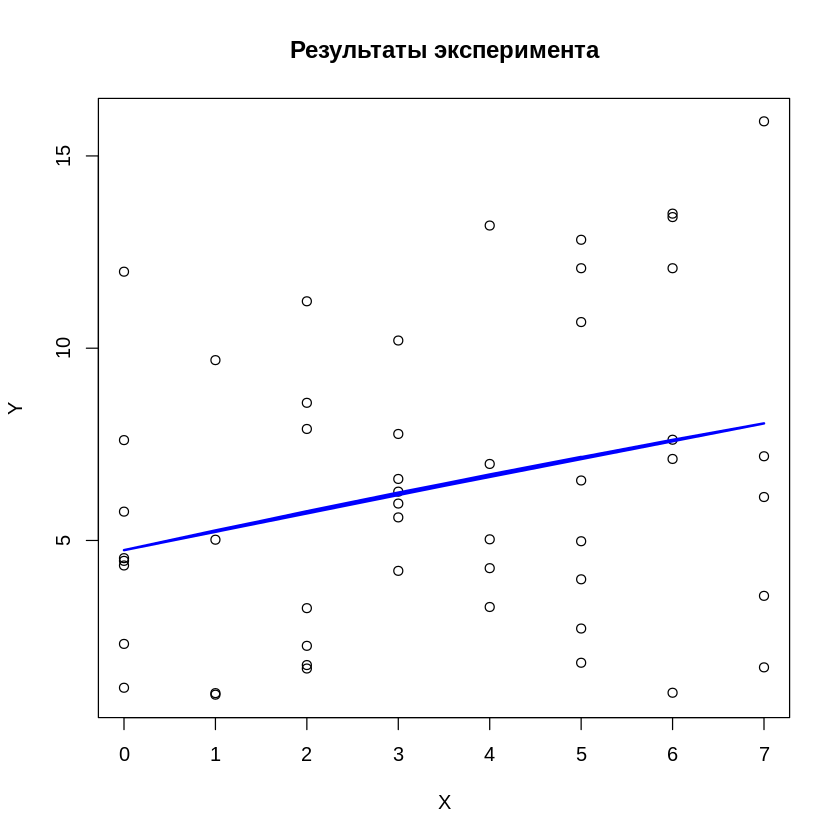

In [69]:
X_matrix <- rbind(vector_of_ones, X, X^2)

beta <- solve(X_matrix %*% t(X_matrix)) %*% X_matrix %*% Y

print(beta)

f <- function(x) {
  return(-0.007 * x^2 + 0.52 * x + 4.748)
}

y_reg <- f(X)

plot(X, Y, xlab = "X", ylab = "Y", main = "Результаты эксперимента")
lines(X, y_reg, col = "blue", lwd = 2)

###6) Построить несмещённую оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.
Теперь $r = rankX = 3$
\
$RSS(\widehat{β}) = \sum_{i=1}^{n}(Y_i - \widehat{β_0} - \widehat{β_1}x_i - \widehat{β_1}x_i^2)^2 = 648.37$
\
$s^2 = \frac{648.37}{47} = 13.79$

In [58]:
f_sum <- function(yC, xC) {
  sum <- 0
  for(i in 1:50){
    sum <- sum + (yC[i] - 0.472 * -0.007 * xC[i]^2 + 0.52 * xC[i] + 4.748)
  }
  return(sum)
}

rss <- f_sum(Y,X)

print(rss)

[1] 648.3721


Построим гистограмму с шагом h = 2.10 на базе ошибок.

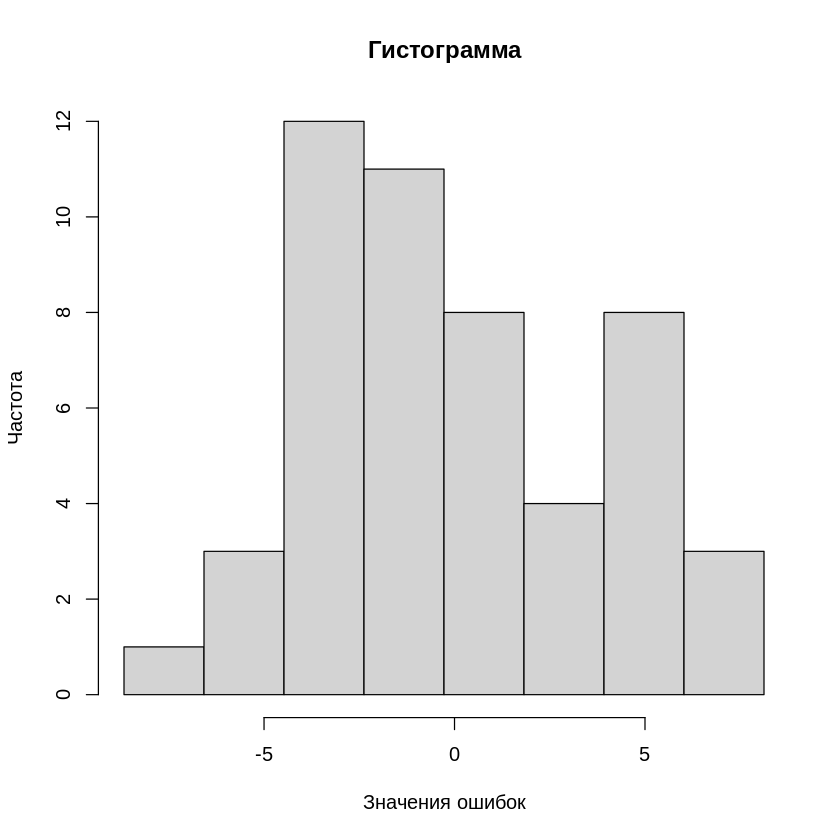

In [70]:
Y_errors <- Y - y_reg

hist_obj <- hist(Y_errors, breaks = seq(min(Y_errors)-2.1, max(Y_errors)+2.1, by = 2.1), main = "Гистограмма", xlab = "Значения ошибок", ylab = "Частота")

$H_0: Φ ≡ F_0$ - основная теория, где $Φ$ - функция нормального распределения, а $F_0$ - функция распределения ошибок.
\
$H_0: Φ(x) \ne F_0(x)$ - альтернативная теория при некотором $x \in ℝ$
\
Сгруппируем данные в соответствие с гистограммой:
\
\begin{array}{|c|c|c|}
 \hline
 j & I_j & ν_j \\
 \hline
 1 & (-8.676, -6.576] & 1  \\
 \hline
 2 & (-6.576, -4.476] & 3 \\  
 \hline
 3 & (-4.476, -2.376] & 12  \\
 \hline
 4 & (-2.376, -0.276] & 11 \\
 \hline
 5 & (-0.276, 1.824] & 8 \\
 \hline
 6 & (1.824, 3.924] & 4 \\
 \hline
 7 & (3.924, 6.024] & 8  \\  
 \hline
 8 & (6.024, 8.124] & 3  \\  
 \hline
\end{array}
\
Статистику критерия хи-квадрат можно вычислить по формуле: $χ^2 = \sum_{j=1}^{r}\frac{(ν_j-np_{j0})^2}{np_{j0}}$
\
$p_{0j}$ - гипотетические вероятности попадания в интервалы, вычисляемые по формуле: $Φ(I_j) = Φ(b) - Φ(a)$, предполагается, что $e⁓𝒩(0, s^2E)$, где Е - это единичная матрица, а e - матрица неустранимых ошибок
\
Отсюда следует, что $χ^2 = 9.316633$.

In [60]:
leftInterval <- c(-8.676, -6.576, -4.476, -2.376, -0.276, 1.824, 3.924, 6.024)
rightInterval <- c(-6.576, -4.476, -2.376, -0.276, 1.824, 3.924, 6.024, 8.124)
freq <- c(1, 3, 12, 11, 8, 4, 8, 3)

f_dnorm <- function(lI, rI){
  result <- rep(NA, times = 8)
  for(i in 1:8){
    result[i] <- pnorm(rI[i], 0, 13.79^0.5) - pnorm(lI[i], 0, 13.79^0.5)
  }
  return(result)
}

p0j <- f_dnorm(leftInterval, rightInterval)

stat_crit <- function(p0jc, freqc){
  result <- rep(NA, times = 8)
  for(i in 1:8){
    result[i] <- ((freqc[i] - 50 * p0jc[i])^2)/(50 * p0jc[i])
  }
  return(result)
}

X2 <- sum(stat_crit(p0j, freq))
print(X2)

[1] 9.316633


$x_α: K_{r-1}(x_α) = 1 - α = 1 - 0.2 = 0.8$
\
$x_α$ в данном случае также будет равен 9.80325.
\
$x_α > χ^2 ⇒ $ гипотеза принимается, т.е. $e ∼ 𝒩(0, 13.79)$.

Теперь оценим расстояние полученной оценки класса нормальных распределений по Колмогорову.

In [61]:
ks.test(Y_errors, "pnorm")


	Exact one-sample Kolmogorov-Smirnov test

data:  Y_errors
D = 0.3541, p-value = 4.096e-06
alternative hypothesis: two-sided


Так как p-value < α, то наша теория будет опровергаться по Колмагорову. Визуализируем полученный результат.

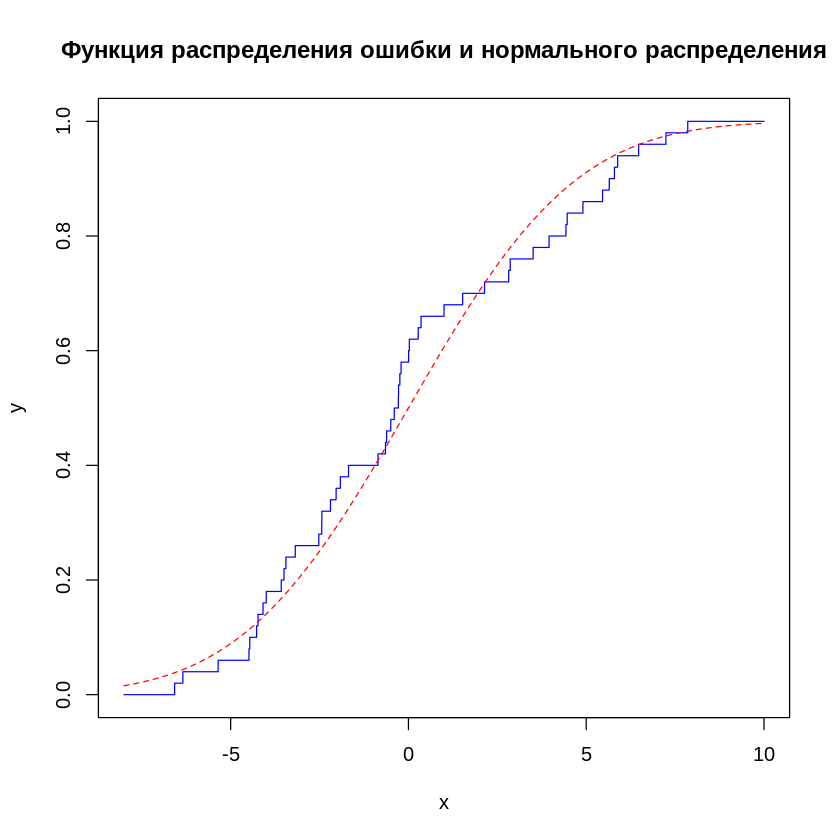

In [62]:
Fn <- function(x) {
  Ye <- c(-0.278, -0.241, -5.353, 6.474, 5.884, -0.855, -4, 5.46, 5.647, 0.274, 7.242, -4.271, 3.955, 0.004, 7.855, 4.464, -1.915, 1.525, -0.496, -4.485, 4.429, 0.025, -3.5, 0.355, -0.613, -2.193, -2.035, -0.208, -0.398, 4.907, -3.183, -4.463, -4.231, 2.862, 3.507, 1.002, -2.436, -6.576, -3.446, -3.578, 5.794, 2.82, -0.285, -0.645, 2.14, -6.345, -4.09, -1.686, -2.438, -2.52)

  sm <- sum(Ye < x)
  return(sm / 50)
}

x_val <- seq(-8, 10, 0.001)
y_err <- sapply(x_val, Fn)
y_norm <- pnorm(x_val, mean = 0, sd = sqrt(13.79))

plot(x_val, y_err, type = 'l', col = 'blue', xlab = 'x', ylab = 'y', main = 'Функция распределения ошибки и нормального распределения')
lines(x_val, y_norm, col = 'red', lty = 2)

###7)В предположении нормальности ошибок построить доверительные интервалы для параметров $β_{0},β_{1},β_{2}$ уровня доверия 1 - α. Написать уравнение доверительного эллипсоида уровня доверия 1 - α.
Построим доверительный интервал (промежуточные вычисления представлены в коде ниже):
\
$Ψ_{β0} =
\left[ {\begin{array}{cc}
    1  \\
    0 \\
    0
\end{array} } \right]^T
\
\left[ {\begin{array}{cc}
  β_0  \\
  β_1 \\
  β_2
\end{array} } \right]
\
Ψ_{β1} =
\left[ {\begin{array}{cc}
    0  \\
    1 \\
    0
\end{array} } \right]^T
\
\left[ {\begin{array}{cc}
  β_0  \\
  β_1 \\
  β_2
\end{array} } \right]
\
Ψ_{β2} =
\left[ {\begin{array}{cc}
    0  \\
    0 \\
    1
\end{array} } \right]^T
\
\left[ {\begin{array}{cc}
  β_0  \\
  β_1 \\
  β_2
\end{array} } \right]$
\
\
$b_{Ψ} = C^T(XX^T)^{-1}C$
\
$b_{Ψ_{β_0}} = 0.101$
\
$b_{Ψ_{β_1}} = 0.047$
\
$b_{Ψ_{β_2}} = 0.00094$
\
\
$\widehat{Ψ} = C^T
\
\left[ {\begin{array}{cc}
  \widehat{β_0}  \\
  \widehat{β_1} \\
\end{array} } \right]$
\
$\widehat{Ψ_{β_0}} = 4.748$
\
$\widehat{Ψ_{β_1}} = 0.52$
\
$\widehat{Ψ_{β_2}} = -0.007$
\
Известно, что: $\frac{\widehat{Ψ} - Ψ}{s\sqrt{b_Ψ}} \sim S_{n-r}$. Таким образом, доверительный интервал будет равен:
\
$Ψ \in [\widehat{Ψ_β} - x_αs\sqrt{b}, \widehat{Ψ_β} + x_αs\sqrt{b}]$, где $x_α: S_{n-r}(x_α) = 1 - \frac{α}{2} = 0.9$
\
Используя язык R получаем, что $x_α = 1,299$, таким образом:
\
\
Доверительный интервал $β_0$: от 3.216268 до 6.279732
\
Доверительный интервал $β_1$: от -0.5211368 до 1.561137
\
Доверительный интервал $β_2$: от -1.048137 до 1.034137

In [63]:
C0 <- c(1, 0, 0)
C1 <- c(0, 1, 0)
C2 <- c(0, 0, 1)

b0 <- t(C0) %*% solve(X_matrix %*% t(X_matrix)) %*% C0
b1 <- t(C1) %*% solve(X_matrix %*% t(X_matrix)) %*% C1
b2 <- t(C2) %*% solve(X_matrix %*% t(X_matrix)) %*% C2

cat("b0:",b0,"\n")
cat("b1:",b1,"\n")
cat("b2:",b2,"\n")

x_a <- qt(0.9, 47)
# 4.748 0.52 -0.007
cat("x_a:",x_a,"\n")
cat("Доверительный интервал beta-0: от", 4.748 - x_a * sqrt(13.79 * b0), "до", 4.748 + x_a * sqrt(13.79 * b0), "\n")
cat("Доверительный интервал beta-1: от", 0.52 - x_a * sqrt(13.79 * b1), "до", 0.52 + x_a * sqrt(13.79 * b1), "\n")
cat("Доверительный интервал beta-2: от", -0.007 - x_a * sqrt(13.79 * b1), "до", -0.007 + x_a * sqrt(13.79 * b1), "\n")

b0: 0.1007004 
b1: 0.04652448 
b2: 0.0009402508 
x_a: 1.299825 
Доверительный интервал beta-0: от 3.216268 до 6.279732 
Доверительный интервал beta-1: от -0.5211368 до 1.561137 
Доверительный интервал beta-2: от -1.048137 до 1.034137 


In [64]:
X_matrix %*% t(X_matrix)

,vector_of_ones,X,
vector_of_ones,50,170,836
X,170,836,4580
,836,4580,26744


Теперь построим доверительные эллипсоиды уровня доверия 1 - α для параметров.
\
$A_α = \{\vec{x}: (\vec{x} - \widehat{Ψ})^T B^{-1} (\vec{x} - \widehat{Ψ}) \le qs^2x_α \}$, где $x_α: F_{q,n-r}(x_α) = 1 - α$, $\space B = C^T(XX^T)^{-1}C$
\
Чтобы построить эллипс для обоих параметров надо взять $C = E$, тогда после несложных преобразований получим, что $B = XX^T$.
\
$x_α = 1.665$
\
Построим уравнение эллипса:
\
\
$\left( \left[ {\begin{array}{cc}
    x  \\
    y \\
    z
\end{array} } \right]-
\left[ {\begin{array}{cc}
    4.748 \\ 0.52 \\ -0.007
\end{array} } \right] \right)^T
\left[ {\begin{array}{cc}
    50 & 170 & 836 \\
    170 & 836 & 4580\\
    836 & 4580 & 26744
\end{array} } \right]
\left(\left[ {\begin{array}{cc}
    x  \\
    y \\
    z
\end{array} } \right]-
\left[ {\begin{array}{cc}
    4.748 \\ 0.52 \\ -0.007
\end{array} } \right]\right) \le 3 \cdot 13.79 \cdot 1.665$. Отсюда следует:
\
$50x^2 + 836y^2 + 26744z^2 + 340xy + 1672xz + 9160yz - 639.896x -2419.64y-12327.44z + 2036.193 \le 0$



###8)Сформулировать гипотезу линейной регрессионной зависимости пременной Y от переменной X и проверить её значимость на уровне α.
Нулевая гипотеза: Y не зависит от X. Эта гипотеза верна в том случае, если $β_1 = 0$ и $β_2 = 0$.
\
F-статистика: $F = \frac{SS_Н/q}{SS_e/(n-r)}$, где $SS_Н = RSS(\widehat{β_Н}) - RSS(\widehat{β_Н})$, $\widehat{β_Н}$ - МНК-оценка параметров при выполнении основной гипотезы, $SS_e = RSS(\widehat{β})$
\
Найдём F-статистику и границу критической области $x_α$ с помощью R:
\
$F = 6.056 \quad x_α = 1.665$
\
\
Т.к. $F > x_α$, отвергаем нулевую теорию

In [65]:
betaH <- beta
betaH[2] <- 0
betaH[3] <- 0

rssH <- t(Y - t(X_matrix) %*% betaH) %*% (Y - t(X_matrix) %*% betaH)
ssH <- rssH - rss

fStat <- (ssH/3)/(rss/47)

cat("F-статистика:", fStat, "\n")
cat("x_a:", qf(0.8, 2, 47), "\n")

F-статистика: 6.055771 
x_a: 1.66583 


## Выводы

В ходе данной лабораторной работы была исследована тема линейной регрессии. Был разобран метод наименьших квадратов, с помощью которого можно дать оценку для параметров. Был изучен алгоритм для построения доверительных интервалов, эллипсов и эллипсоидов. Также были исследованы разные методы для доказательства или опровержения гипотез. Например, для доказательства гипотез принадлежности выборки к нормальному распределению и линейной независимости Y от X.     